This dataset contains the titles / features of games and their ratings.

In [103]:
# Math
import numpy as np
import pandas as pd

# Tensorflow
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# SKlearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Plot graphs
import matplotlib.pyplot as plt

In [104]:
# initialize the datasets
data = pd.read_csv("../dataset/ESRB.csv")
data_test = pd.read_csv("../dataset/ESRB_test.csv")

# Perserve copy of original data 
old_data = data.copy()

# Concat dataset
data = pd.concat([data, data_test])

data.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [105]:
print("Row / Columns: {}".format(data.shape))

print("Class distribution is: {}".format(data['esrb_rating'].value_counts()))

Row / Columns: (2395, 34)
Class distribution is: T     873
ET    529
E     516
M     477
Name: esrb_rating, dtype: int64


## Method / predictions
We can see there are 33 features, mostly binary features, except for the title and label. I will be comparing the results of descision tree and a dense network. After that we will be assesing the performance with F1 score. 

I predict that both will be overfit, maybe the dense network a bit more than the descision tree.

In [106]:
# Preprocessing
data = data.drop('title', axis=1) 

labels = pd.get_dummies(data['esrb_rating'])

data.pop('esrb_rating')

0       E
1      ET
2       M
3      ET
4       T
       ..
495     M
496     M
497     M
498     T
499     T
Name: esrb_rating, Length: 2395, dtype: object

In [107]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size = 0.7,  stratify = labels, random_state = 420) 

In [108]:
# Define models
decision_tree = DecisionTreeClassifier(max_depth = 12)

dense_net = Sequential()

dense_net.add(Dense(32, activation='relu'))
dense_net.add(Dense(4, activation='softmax'))

dense_net.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy')

In [109]:
hist_decision_tree = decision_tree.fit(X_train, y_train)
hist_dense_net = dense_net.fit(X_train, y_train, epochs = 25, validation_split=0.2)

Epoch 1/25
42/42 [==============================] - 2s 21ms/step - loss: 1.3726 - val_loss: 1.2398
Epoch 2/25
42/42 [==============================] - 1s 14ms/step - loss: 1.1976 - val_loss: 1.1197
Epoch 3/25
42/42 [==============================] - 1s 19ms/step - loss: 1.0753 - val_loss: 1.0018
Epoch 4/25
42/42 [==============================] - 0s 11ms/step - loss: 0.9479 - val_loss: 0.8848
Epoch 5/25
42/42 [==============================] - 1s 16ms/step - loss: 0.8169 - val_loss: 0.7779
Epoch 6/25
42/42 [==============================] - 1s 14ms/step - loss: 0.7231 - val_loss: 0.6878
Epoch 7/25
42/42 [==============================] - 1s 13ms/step - loss: 0.6239 - val_loss: 0.6162
Epoch 8/25
42/42 [==============================] - 1s 17ms/step - loss: 0.5440 - val_loss: 0.5626
Epoch 9/25
42/42 [==============================] - 1s 14ms/step - loss: 0.4975 - val_loss: 0.5227
Epoch 10/25
42/42 [==============================] - 0s 10ms/step - loss: 0.4565 - val_loss: 0.4940
Epoch 11/

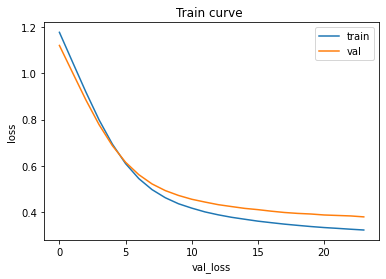

In [110]:
# Plot fitting history dense net

plt.plot(hist_dense_net.history['loss'][1:])
plt.plot(hist_dense_net.history['val_loss'][1:])

plt.title('Train curve ')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['train', 'val'], loc='upper right')

plt.show()



In [111]:
# Get predictions
decision_tree_prediction = decision_tree.predict(X_test)

dense_net_prediction = dense_net.predict(X_test)
dense_net_prediction = np.where(dense_net_prediction > 0.5, 1, 0 )

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, mean_squared_error, r2_score, mean_absolute_error

print("Decision tree:\n")

print("Accuracy: {}".format(accuracy_score(y_test, decision_tree_prediction)))
print("Precision: {}".format(precision_score(y_test, decision_tree_prediction, average = "weighted")))
print("Recall: {}".format(recall_score(y_test, decision_tree_prediction, average = 'weighted')))
print("F1: {}".format(f1_score(y_test, decision_tree_prediction, average = 'weighted')))

print("\nDense Net:\n")

print("Accuracy: {}".format(accuracy_score(y_test, dense_net_prediction)))
print("Precision: {}".format(precision_score(y_test, dense_net_prediction, average = "weighted")))
print("Recall: {}".format(recall_score(y_test, dense_net_prediction, average = 'weighted')))
print("F1: {}".format(f1_score(y_test, dense_net_prediction, average = 'weighted')))


Decision tree:

Accuracy: 0.7691237830319889
Precision: 0.8534400992664103
Recall: 0.7691237830319889
F1: 0.8084324808105827

Dense Net:

Accuracy: 0.827538247566064
Precision: 0.8483230122013273
Recall: 0.827538247566064
F1: 0.8377891711631748


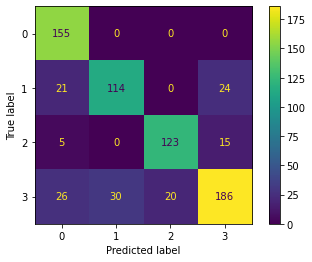

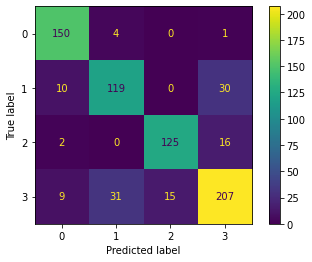

In [114]:
# Decision tree

# Initialize
confusion_matrix_decision_tree = confusion_matrix(y_test.to_numpy().argmax(axis=1), decision_tree_prediction.argmax(axis=1))
# Plot
ConfusionMatrixDisplay(confusion_matrix_decision_tree).plot()


# Dense network

confusion_matrix_dense = confusion_matrix(y_test.to_numpy().argmax(axis=1), dense_net_prediction.argmax(axis=1))
# Plot
ConfusionMatrixDisplay(confusion_matrix_dense).plot()


### Evaluation


We can see that the dense net won from the decision tree with 83.7 vs 80.8.

My prediction was not accurate, I suspected that the decision tree would perform beter since the dense net could overfit, on this dataset. When you take a look at the learning curve you can see that this indeed happens after some epochs but the cutoff point of the validation accuracy is low enough for it to not overfit that fast. DT's actually tend to overfit the data. 